In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target'] = iris.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df[df['target'] == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [11]:
df[df['target'] == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [12]:
df['flower name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

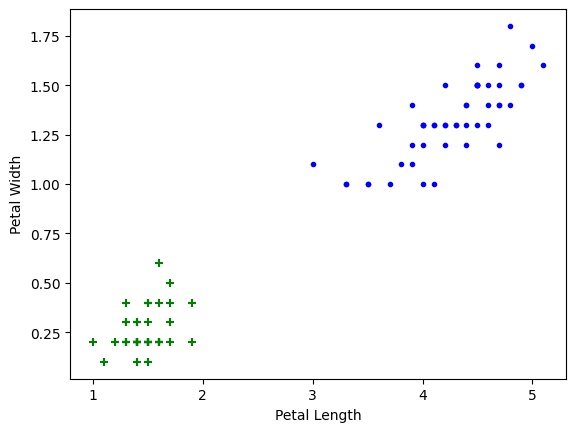

In [34]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [16]:
from sklearn.svm import SVC

In [17]:
model = SVC()

In [18]:
X = df.drop(['target', 'flower name'], axis='columns')
y = df.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
model.fit(X_train, y_train)

SVC()

In [20]:
model.score(X_test, y_test)

0.9666666666666667

In [21]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test,y_test)

0.9666666666666667

In [31]:
y_pred = model.predict(X_test)

In [29]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test,y_test)

0.9666666666666667

In [25]:
model_g = SVC(gamma=1)
model_g.fit(X_train, y_train)
model_g.score(X_test,y_test)

0.9666666666666667

In [35]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [36]:
model_linear_kernal.score(X_test,y_test)

1.0

In [26]:
from sklearn.metrics import confusion_matrix

In [32]:
print(confusion_matrix(y_test,y_pred))

[[ 8  0  0]
 [ 0  7  0]
 [ 0  1 14]]


In [37]:
from sklearn import metrics
# accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred))
# precision score
print("precision:", metrics.precision_score(y_test,y_pred, average='macro'))
# recall score
print("recall" , metrics.recall_score(y_test,y_pred, average='macro'))
print(metrics.classification_report(y_test, y_pred))

acuracy: 0.9666666666666667
precision: 0.9583333333333334
recall 0.9777777777777779
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.88      1.00      0.93         7
           2       1.00      0.93      0.97        15

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



In [38]:
svc = SVC(kernel='rbf', C=10, gamma=10).fit(X, y)

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':(1, 10, 100, 1000), 'gamma':(0.1, 0.01, 0.001, 0.0001)}
grid_search = GridSearchCV(svc, param_grid, cv=10, verbose=10)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START C=1, gamma=0.1............................................
[CV 1/10; 1/16] END .............C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 2/10; 1/16] START C=1, gamma=0.1............................................
[CV 2/10; 1/16] END .............C=1, gamma=0.1;, score=0.833 total time=   0.0s
[CV 3/10; 1/16] START C=1, gamma=0.1............................................
[CV 3/10; 1/16] END .............C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 4/10; 1/16] START C=1, gamma=0.1............................................
[CV 4/10; 1/16] END .............C=1, gamma=0.1;, score=0.833 total time=   0.0s
[CV 5/10; 1/16] START C=1, gamma=0.1............................................
[CV 5/10; 1/16] END .............C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 6/10; 1/16] START C=1, gamma=0.1............................................
[CV 6/10; 1/16] END .............C=1, gamma=0.

GridSearchCV(cv=10, estimator=SVC(C=10, gamma=10),
             param_grid={'C': (1, 10, 100, 1000),
                         'gamma': (0.1, 0.01, 0.001, 0.0001)},
             verbose=10)